In [1]:
import pandas as pd
import numpy as np                     # For mathematical calculations               
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline
import seaborn as sns # For data visualization
sns.set_style('whitegrid')

In [2]:
data = pd.read_csv("2010-capitalbikeshare-tripdata.csv")

In [3]:
data.head()

#Lets analyse the measures of central dispersion of the data for the few columns with Numeric values


,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,1012,2010-09-20 11:27:04,2010-09-20 11:43:56,31208,M St & New Jersey Ave SE,31108,4th & M St SW,W00742,Member
1,61,2010-09-20 11:41:22,2010-09-20 11:42:23,31209,1st & N St SE,31209,1st & N St SE,W00032,Member
2,2690,2010-09-20 12:05:37,2010-09-20 12:50:27,31600,5th & K St NW,31100,19th St & Pennsylvania Ave NW,W00993,Member
3,1406,2010-09-20 12:06:05,2010-09-20 12:29:32,31600,5th & K St NW,31602,Park Rd & Holmead Pl NW,W00344,Member
4,1413,2010-09-20 12:10:43,2010-09-20 12:34:17,31100,19th St & Pennsylvania Ave NW,31201,15th & P St NW,W00883,Member


In [4]:
data.describe()
#Check the variables/features of the dataset
data.columns

Index(['Duration', 'Start date', 'End date', 'Start station number',
       'Start station', 'End station number', 'End station', 'Bike number',
       'Member type'],
      dtype='object')

In [5]:
#Univariate Analysis
#Exploring the Target Variable. Our target variable is the Member Type column
data['Member type'].value_counts()

Member     91586
Casual     24001
Unknown       10
Name: Member type, dtype: int64

In [6]:
#Convert the Categorical Values to Numerical to allow us perform plotting
#import the library LabelEncoder
from sklearn.preprocessing import LabelEncoder
#Create a list with categorical predictors
cat_var =['Start station','End station','Bike number','Member type']
#Initiate LabelEncoder
le = LabelEncoder() 
#A for loop to transform the categorical values to numerical values
for n in cat_var:
    data[n] = le.fit_transform(data[n])


In [7]:
#Checking for the type of the predictors afterwards
data.dtypes

Duration                 int64
Start date              object
End date                object
Start station number     int64
Start station            int32
End station number       int64
End station              int32
Bike number              int32
Member type              int32
dtype: object

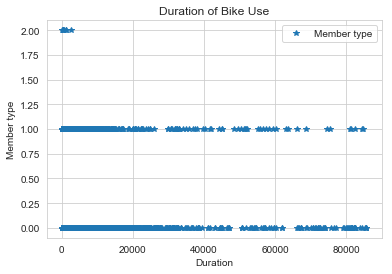

In [8]:
#Explore the relationship between duration and member type
data.plot( x='Duration', y='Member type',style='*')  
plt.title('Duration of Bike Use')  
plt.xlabel('Duration')  
plt.ylabel('Member type')  
plt.show() 

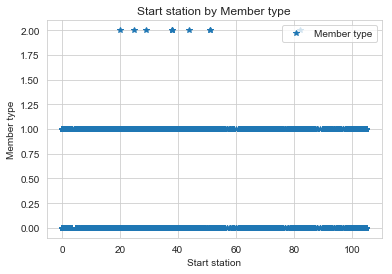

In [9]:
#Explore the relationship between Start Station and member type
data.plot( x='Start station', y='Member type',style='*')  
plt.title('Start station by Member type')  
plt.xlabel('Start station')  
plt.ylabel('Member type')  
plt.show()  


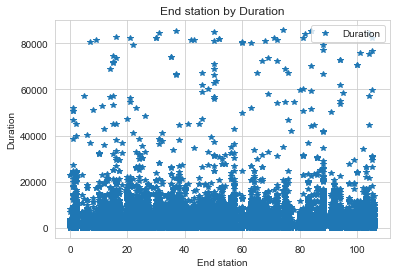

In [10]:
#Explore the relationship between End Station and Duration
data.plot( x='End station', y='Duration',style='*')  
plt.title('End station by Duration')  
plt.xlabel('End station')  
plt.ylabel('Duration')  
plt.show()  


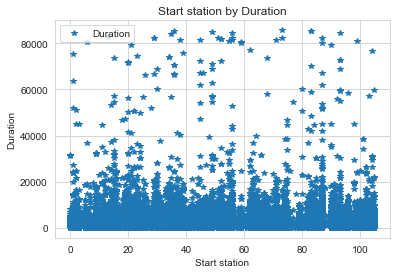

In [11]:
#Explore the relationship between Start Station and Duration
data.plot( x='Start station', y='Duration',style='*')  
plt.title('Start station by Duration')  
plt.xlabel('Start station')  
plt.ylabel('Duration')  
plt.show() 

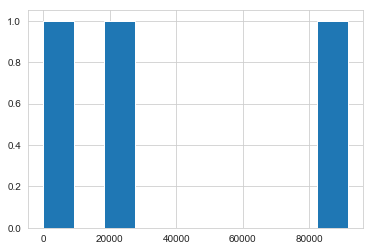

In [12]:
#Lets plot a simple bar graph on the target variable
data['Member type'].value_counts().hist()

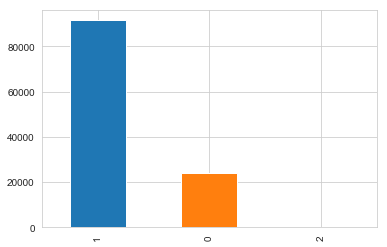

In [13]:
#Lets plot a simple bar graph on the target variable and confirm the output we got earlier
data['Member type'].value_counts().plot.bar();


In [14]:

#Creation of Duration categories and analysing them per Member Type
bins=[0,2500,4000,6000,25000]
group=['Low','Average','High', 'Very high']
data['Duration']=pd.cut(data['Duration'],bins,labels=group)


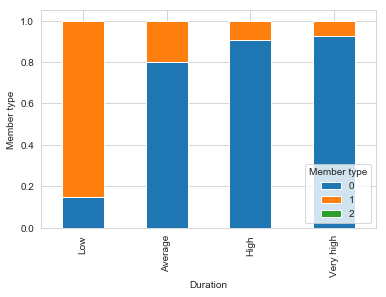

In [15]:
Duration=pd.crosstab(data['Duration'], data['Member type'])
Duration.div(Duration.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Duration')
P = plt.ylabel('Member type')


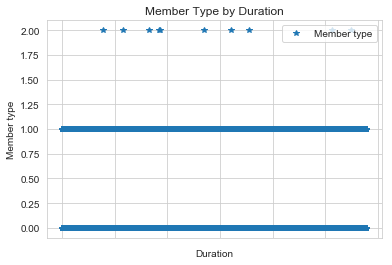

In [16]:
data.plot(x='Duration', y='Member type', style='*')  
plt.title('Member Type by Duration')  
plt.xlabel('Duration')  
plt.ylabel('Member type')  
plt.show() 

In [17]:
#import the library LabelEncoder
from sklearn.preprocessing import LabelEncoder
#Create a list with categorical predictors
cat_var =['Start station','End station','Bike number','Member type']
#Initiate LabelEncoder
le = LabelEncoder() 
#A for loop to transform the categorical values to numerical values
for n in cat_var:
    data[n] = le.fit_transform(data[n])

#Checking for the type of the predictors afterwards
data.dtypes

#Creating variables x is ithe input and Y is the target
X = data.iloc[:, 0:6]

Y = data[data.columns[-1]]


data.head()


,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,Low,2010-09-20 11:27:04,2010-09-20 11:43:56,31208,85,31108,50,614,1
1,Low,2010-09-20 11:41:22,2010-09-20 11:42:23,31209,32,31209,33,41,1
2,Average,2010-09-20 12:05:37,2010-09-20 12:50:27,31600,52,31100,31,836,1
3,Low,2010-09-20 12:06:05,2010-09-20 12:29:32,31600,52,31602,94,282,1
4,Low,2010-09-20 12:10:43,2010-09-20 12:34:17,31100,30,31201,21,734,1


In [19]:
data['Duration'].value_counts()

Low          106001
Very high      3385
Average        3339
High           2645
Name: Duration, dtype: int64

In [21]:
data = data.replace('Low',0)

In [22]:
data = data.replace('High',2)
data = data.replace('Average',1)
data = data.replace('Very High',3)

In [34]:
data = data.replace('Very high',3)

In [38]:
data = data.replace('NaN',0.5)

In [39]:
data.columns

Index(['Duration', 'Start date', 'End date', 'Start station number',
       'Start station', 'End station number', 'End station', 'Bike number',
       'Member type'],
      dtype='object')

In [48]:
pd.DataFrame(data).fillna(x_test.mean())

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,0.00000,2010-09-20 11:27:04,2010-09-20 11:43:56,31208,85,31108,50,614,1
1,0.00000,2010-09-20 11:41:22,2010-09-20 11:42:23,31209,32,31209,33,41,1
2,1.00000,2010-09-20 12:05:37,2010-09-20 12:50:27,31600,52,31100,31,836,1
3,0.00000,2010-09-20 12:06:05,2010-09-20 12:29:32,31600,52,31602,94,282,1
4,0.00000,2010-09-20 12:10:43,2010-09-20 12:34:17,31100,30,31201,21,734,1
5,0.00000,2010-09-20 12:14:27,2010-09-20 12:30:50,31109,53,31200,88,708,1
6,0.00000,2010-09-20 12:15:26,2010-09-20 12:30:56,31109,53,31105,13,664,1
7,0.00000,2010-09-20 12:16:36,2010-09-20 12:44:15,31111,1,31208,86,918,1
8,0.00000,2010-09-20 12:18:38,2010-09-20 13:00:15,31600,52,31601,28,672,1
9,0.00000,2010-09-20 12:19:46,2010-09-20 12:44:34,31703,88,31603,32,663,1


In [51]:
data.isnull().sum()

Duration                227
Start date                0
End date                  0
Start station number      0
Start station             0
End station number        0
End station               0
Bike number               0
Member type               0
dtype: int64

In [54]:
x = data[['Start station number','Start station','End station number','End station','Bike number']]
y = data['Member type']
from sklearn.model_selection import train_test_split
x_train ,x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.2)

MODELS

RandomForest

In [55]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(x_train,y_train)
forest.score(x_test,y_test)

C:\Users\Ankur\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7582612456747405

GradientBoosting

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
boost = GradientBoostingClassifier()
boost.fit(x_train,y_train)
boost.score(x_test,y_test)

0.804022491349481

Decison Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
tree.score(x_test,y_test)

0.7365484429065744